In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_moons

from mpl_toolkits.mplot3d import Axes3D


In [3]:

# load the data
normals = pd.read_csv('2dnormals.csv')
xor = pd.read_csv('xor.csv')
# map classes as -1 or 1
normals['classes'] = normals['classes'].map({2:1, 1:-1})
xor['classes'] = xor['classes'].map({2:1, 1:-1})


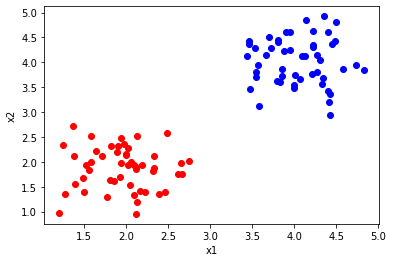

In [10]:
def func_normal(mean, std, label, dim=2, N=50):
    xc = np.random.normal(loc=mean, scale=std, size=(N, len(mean)))
    data_xc = pd.DataFrame(xc, columns=['x1','x2'])
    data_xc['y'] = label
    return data_xc
    
def plot_func(data):
    t_class0 = data['y'] == -1
    t_class1 = data['y'] == 1

    fig, ax = plt.subplots()

    ax.scatter(data.loc[t_class0, 'x1'],
                data.loc[t_class0, 'x2'], color='red')
    ax.scatter(data.loc[t_class1, 'x1'], data.loc[t_class1, 'x2'], color='blue')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    return fig, ax

data_c1 = func_normal([2,2], [0.4, 0.4], -1)
data_c2 = func_normal([4,4], [0.4, 0.4], 1)

data = pd.concat([data_c1, data_c2], ignore_index=True)
fig, ax = plot_func(data)
fig.show()

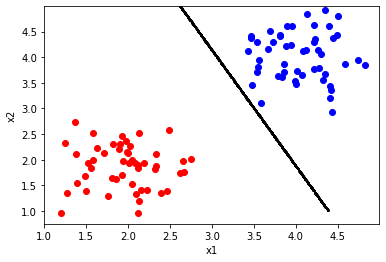

In [11]:
y_train = data['y'].to_numpy()
x_train = data[['x1', 'x2']].to_numpy()
fig, ax = plot_func(data)

for i in range(10):
    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_dec = perceptron.predict(grid)
    zz = y_dec.reshape(xx.shape)

    ax.contour(xx, yy, zz, colors=['black'])

fig.show()



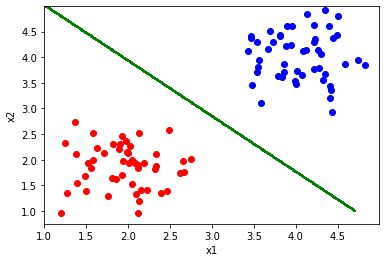

In [12]:
fig, ax = plot_func(data)
for i in range(10):
    svm = LinearSVC()
    svm.fit(x_train, y_train)

    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_per = perceptron.predict(grid)
    y_svm = svm.predict(grid)
    
    zz_per = y_per.reshape(xx.shape)
    zz_svm = y_svm.reshape(xx.shape)

    #ax.contour(xx, yy, zz_per, colors=['black'])
    ax.contour(xx, yy, zz_svm, colors=['green'])


fig.show()


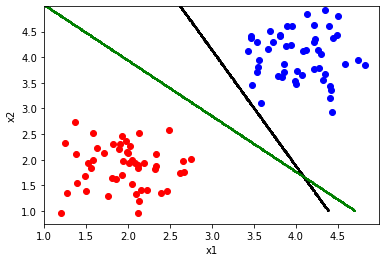

In [17]:
fig, ax = plot_func(data)
for i in range(10):
    svm = LinearSVC()
    svm.fit(x_train, y_train)

    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)

    x = np.arange(1, 5, step=0.01)
    y = np.arange(1, 5, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_per = perceptron.predict(grid)
    y_svm = svm.predict(grid)
    
    zz_per = y_per.reshape(xx.shape)
    zz_svm = y_svm.reshape(xx.shape)

    ax.contour(xx, yy, zz_per, colors=['black'])
    ax.contour(xx, yy, zz_svm, colors=['green'])

fig.show()


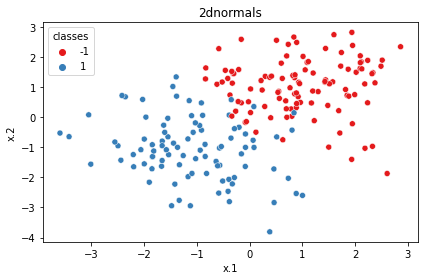

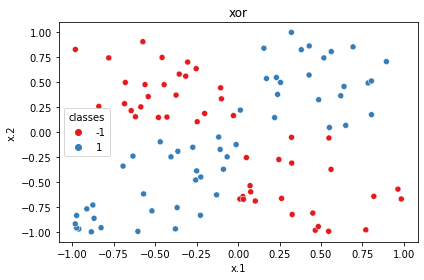

In [5]:
# plot the functions
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=normals, x="x.1", y="x.2", hue='classes', ax=ax, palette='Set1')
ax.set_title('2dnormals')
fig.tight_layout()
fig.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=xor, x="x.1", y="x.2", hue='classes', ax=ax,palette='Set1')
ax.set_title('xor')
fig.tight_layout()
fig.show()

In [57]:
X, y = make_moons(noise=0.3, random_state=0)
# map classes as -1 or 1
spirals = pd.DataFrame(X, columns=['x.1','x.2'])
spirals['classes'] = y
spirals['classes'] = spirals['classes'].map({1:1, 0:-1})

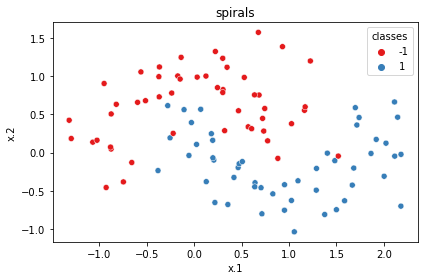

In [58]:
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(data=spirals, x="x.1", y="x.2", hue='classes', ax=ax, palette='Set1')
ax.set_title('spirals')
fig.tight_layout()
fig.show()

In [68]:
def plot_decision_boundary(data,  model):
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(1, 1, 1)
    #ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    x = np.arange(-1, 2, step=0.01)
    y = np.arange(-1, 2, step=0.01)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # train the model
    y_train = data['classes'].to_numpy()
    x_train = data[['x.1', 'x.2']].to_numpy()
   
    model.fit(x_train, y_train)

    # make predictions for the grid
    yhat = model.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    ax1.contour(xx, yy, zz, colors=['black'])
   
    t_class0 = data['classes'] == -1
    t_class1 = data['classes'] == 1
    ax1.scatter(data.loc[t_class0, 'x.1'],
                data.loc[t_class0, 'x.2'], color='red')
    ax1.scatter(data.loc[t_class1, 'x.1'], data.loc[t_class1, 'x.2'], color='blue')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')

    #surf = ax2.plot_surface(xx, yy, zz, cmap='jet')

    #fig.show()
    return fig, ax1

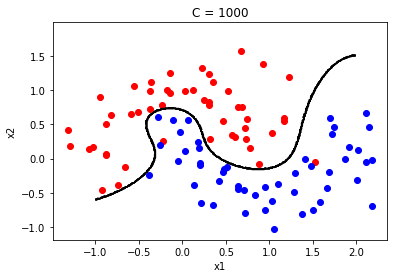

In [75]:
#plot_decision_boundary(spirals, LinearSVC())
fig, ax = plot_decision_boundary(spirals, SVC(C=1000))
ax.set_title('C = 1000')
fig.savefig('fig08.png')


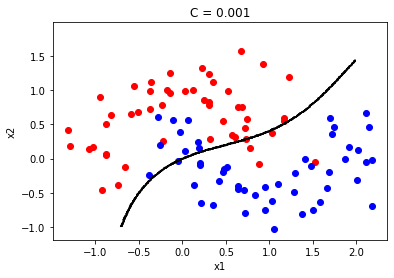

In [76]:
fig, ax = plot_decision_boundary(spirals, SVC(C=0.001))
ax.set_title('C = 0.001')
fig.savefig('fig09.png')

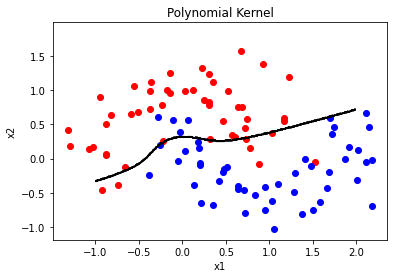

In [85]:
fig, ax = plot_decision_boundary(spirals, SVC(kernel='poly'))
ax.set_title('Polynomial Kernel')
fig.savefig('fig10.png')

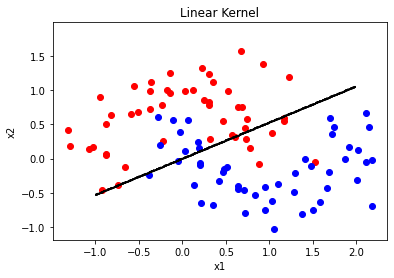

In [86]:
fig, ax = plot_decision_boundary(spirals, SVC(kernel='linear'))
ax.set_title('Linear Kernel')
fig.savefig('fig11.png')